"Object Contour Detection with OpenCV: A Practical Guide"

This notebook demonstrates the application of OpenCV libraries for identifying and drawing contours around objects in an image. Utilizing the concepts of contour detection, the program emphasizes the importance of preprocessing steps, such as thresholding or Canny edge detection, to enhance accuracy. The tutorial references the informative guide at https://learnopencv.com/contour-detection-using-opencv-python-c/ and highlights key considerations, including the reversal of foreground and background colors for effective contour identification. This hands-on guide serves as a valuable resource for individuals exploring shape analysis, object detection, and recognition in image processing using OpenCV.

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
!wget https://i.ebayimg.com/images/g/SwYAAOSw2MBjtTPB/s-l1600.jpg

--2023-08-24 09:11:02--  https://i.ebayimg.com/images/g/SwYAAOSw2MBjtTPB/s-l1600.jpg
Resolving i.ebayimg.com (i.ebayimg.com)... 151.101.2.206, 151.101.66.206, 151.101.130.206, ...
Connecting to i.ebayimg.com (i.ebayimg.com)|151.101.2.206|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 291022 (284K) [image/jpeg]
Saving to: ‘s-l1600.jpg’

s-l1600.jpg         100%[===================>] 284.20K  --.-KB/s    in 0.01s   

2023-08-24 09:11:02 (24.0 MB/s) - ‘s-l1600.jpg’ saved [291022/291022]



In [3]:
image = cv2.imread('/content/Sample_abc.jpg')

In [4]:
# convert the image to grayscale format
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

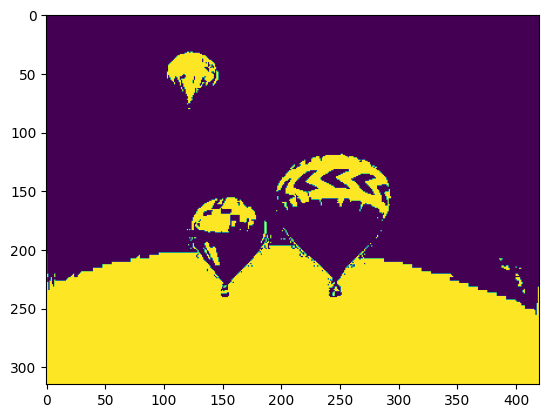

In [5]:
ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
# visualize the binary image
plt.imshow(thresh)

In [6]:

cv2.imwrite('image_thres1.jpg', thresh)

True

In [7]:
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

In [8]:

# draw contours on the original image
image_copy = image.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

array([[[175, 112,  74],
        [165, 102,  64],
        [165, 102,  64],
        ...,
        [162,  98,  63],
        [158,  98,  62],
        [168, 110,  74]],

       [[166, 103,  65],
        [156,  93,  55],
        [155,  92,  54],
        ...,
        [151,  87,  52],
        [147,  87,  51],
        [157,  99,  63]],

       [[165, 102,  64],
        [156,  93,  55],
        [155,  92,  54],
        ...,
        [149,  86,  48],
        [145,  86,  47],
        [156,  99,  60]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [ 97, 228,  80],
        ...,
        [100, 216,  63],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]

True

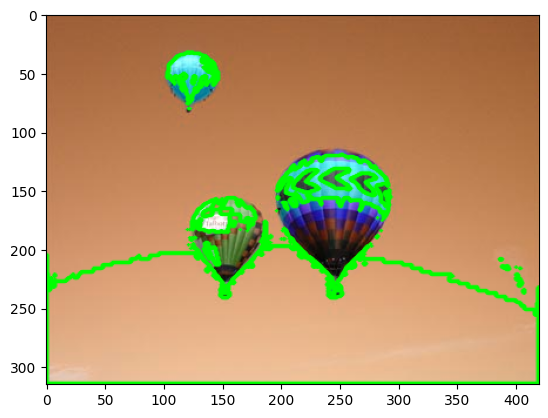

In [9]:
from google.colab.patches import cv2_imshow

# see the results
plt.imshow(image_copy)
cv2.imwrite('contours_none_image1.jpg', image_copy)


True

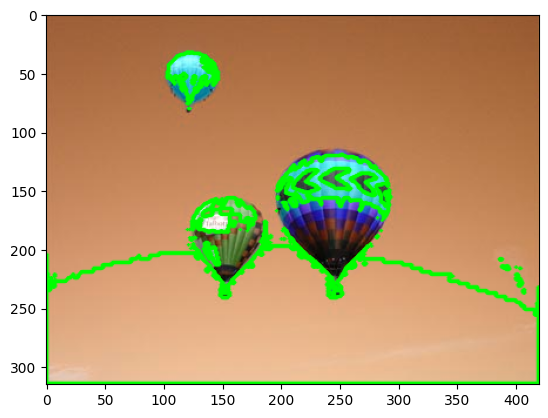

In [10]:
contours1, hierarchy1 = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# draw contours on the original image for `CHAIN_APPROX_SIMPLE`
image_copy1 = image.copy()
cv2.drawContours(image_copy1, contours1, -1, (0, 255, 0), 2, cv2.LINE_AA)
# see the results
plt.imshow(image_copy1)
cv2.imwrite('contours_simple_image1.jpg', image_copy1)

In [11]:
# to actually visualize the effect of `CHAIN_APPROX_SIMPLE`, we need a proper image
image1 = cv2.imread('/content/Sample_abc.jpg')
img_gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

In [12]:

ret, thresh1 = cv2.threshold(img_gray1, 150, 255, cv2.THRESH_BINARY)
contours2, hierarchy2 = cv2.findContours(thresh1, cv2.RETR_TREE,
                                               cv2.CHAIN_APPROX_SIMPLE)

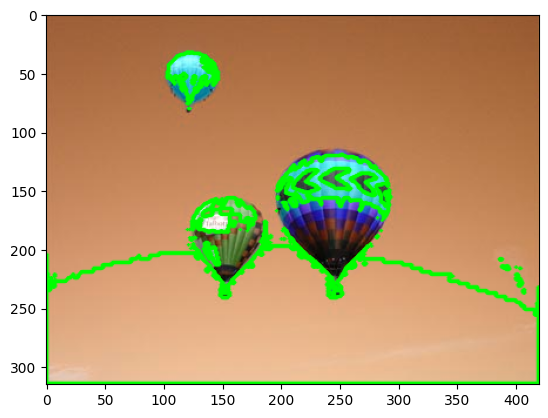

In [13]:
image_copy2 = image1.copy()
cv2.drawContours(image_copy2, contours2, -1, (0, 255, 0), 2, cv2.LINE_AA)
plt.imshow( image_copy2)

True

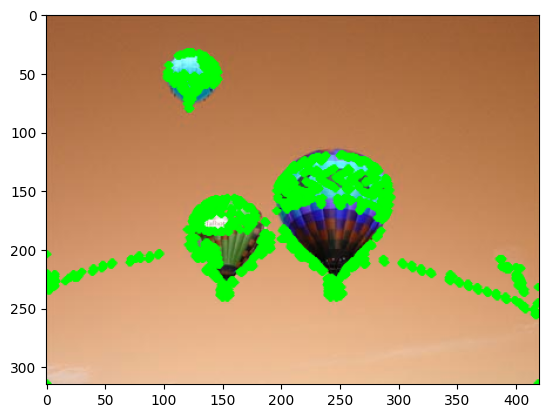

In [14]:

image_copy3 = image1.copy()
for i, contour in enumerate(contours2): # loop over one contour area
   for j, contour_point in enumerate(contour): # loop over the points
       # draw a circle on the current contour coordinate
       cv2.circle(image_copy3, ((contour_point[0][0], contour_point[0][1])), 2, (0, 255, 0), 2, cv2.LINE_AA)
# see the results
plt.imshow( image_copy3)

cv2.imwrite('contour_point_simple.jpg', image_copy3)
